# Análisis de la serie temporal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se importa el dataset colocando la hora local como índice.

In [ ]:
df2015 = pd.read_csv('./drive/MyDrive/DatosInvestigacion/LocalTime_2015.csv', index_col=0, parse_dates=True)

In [ ]:
df2015.head()

,DC,PAAVG1H,PAMAX1H,PAMIN1H,PRSUM1H,RHAVG1H,RHMAX1H,RHMIN1H,SRDIFAVG1H,SRDIFMAX1H,SRDIFMIN1H,SRDIFSUM1H,SRGLOAVG1H,SRGLOMAX1H,SRGLOMIN1H,SRGLOSUM1H,TAAVG1H,TAMAX1H,TAMIN1H,TS1AVG1H,TS1MAX1H,TS1MIN1H,TS2AVG1H,TS2MAX1H,TS2MIN1H,TS3AVG1H,TS3MAX1H,TS3MIN1H,TS4AVG1H,TS4MAX1H,TS4MIN1H,TS5AVG1H,TS5MAX1H,TS5MIN1H,TS6AVG1H,TS6MAX1H,TS6MIN1H,TS7AVG1H,TS7MAX1H,TS7MIN1H,WD1HA,WD1HX,WDGM,WGD1HX,WGDH,WR1H,WS1HA,WS1HM,WS1HX
Local_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,13.1,743.2,743.6,742.8,0.0,98,99,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,9.7,8.1,7.9,8.3,7.2,8.4,8.7,7.6,9.6,9.9,9,11.9,12,11.8,14.3,14.4,14.2,15,15,15,15,15,15,65,21,53,71.0,0.0,15.0,1.0,0.0,2.9
2015-01-01 02:00:00,13.1,742.6,742.8,742.4,0.0,96,97,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.6,9.8,9.1,9.1,9.5,8.3,9.4,9.9,8.7,10.4,10.7,9.9,12.1,12.2,12,14.1,14.2,14.1,15,15,15,15,15,15,43,93,17,49.0,1.0,26.0,1.8,0.0,3.0
2015-01-01 03:00:00,13.1,742.1,742.4,741.9,0.0,94,95,93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.9,10.1,9.7,9.5,9.6,9.5,9.9,9.9,9.9,10.8,10.8,10.7,12.2,12.3,12.2,14,14.1,14,15,15,15,15,15,15,47,84,12,55.0,2.0,28.0,1.9,0.5,2.9
2015-01-01 04:00:00,13.0,741.8,741.9,741.7,0.0,95,96,93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.3,9.7,9.4,9.5,8.9,9.8,9.9,9.3,10.7,10.8,10.3,12.3,12.3,12.2,14,14,14,15,15,15,15,15,15,44,97,31,53.0,3.0,23.0,1.5,0.4,2.7
2015-01-01 05:00:00,13.0,741.8,741.9,741.7,0.0,96,98,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,10.0,9.0,8.1,8.9,7.8,8.5,9.3,8.2,9.7,10.3,9.5,12,12.2,11.9,13.9,14,13.9,15,15,15,15,15,15,50,92,51,33.0,4.0,21.0,1.4,0.4,2.6


Se consigue la variable que se va a predecir durante este proyecto.

In [ ]:
df = df2015['SRGLOAVG1H']
df

Local_Time
2015-01-01 01:00:00    0.0
2015-01-01 02:00:00    0.0
2015-01-01 03:00:00    0.0
2015-01-01 04:00:00    0.0
2015-01-01 05:00:00    0.0
                      ... 
2015-12-31 20:00:00    0.0
2015-12-31 21:00:00    0.0
2015-12-31 22:00:00    0.0
2015-12-31 23:00:00    0.0
2016-01-01 00:00:00    0.0
Name: SRGLOAVG1H, Length: 8760, dtype: float64

### Estacionariedad

Una serie es estacionaria cuando la media y la varianza son constantes a lo largo del tiempo.

In [ ]:
import statsmodels.tsa.stattools as sts 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Se utiliza un método estadístico denominado: Prueba Dickey-Fuller. Consiste en un contraste de hipótesis, la hipótesis nula en este caso es

$H_{0}$: La serie no es estacionaria.



La prueba arroja los siguientes valores.
* Valor estadístico de contraste: -11
* P-value: 8.15e-21

In [ ]:
sts.adfuller(df)

(-11.38901565148182,
 8.154764893350548e-21,
 37,
 8722,
 {'1%': -3.431099968539641,
  '10%': -2.5669464184887825,
  '5%': -2.86187143613454},
 104787.19950317378)

Si el valor del estadístico: -11.38 es menor que el valor crítico: (1%) -3.43, entonces se puede rechazar la hipótesis nula.

Mientras el p-valor sea más cercano a cero, se tiene menos confianza en la hipótesis nula. Por lo tanto, la serie temporal de radiación solar **es estacionaria**.

Esto tiene sentido, pues la radiación solar a lo largo del tiempo no presenta tendencia, es decir, no incrementa o disminuye a lo largo del tiempo. Se mantiene oscilando alrededor de un valor.

## Estacionalidad

La serie es estacional si existen ciertas tendencias que se repiten de forma cíclica.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Una forma de comprobar si la serie actual es estacional es dividiéndola en factores.

**Descomposición clásica (enfoque aditivo)**

Los valores de la serie de tiempo son el resultado de la suma de la tendencia, el efecto estacional y el residuo.

$X_{t}=u{t}+S_{t}+ϵ_{t}$

donde $X_{t}$ es el valor observado, $u_{t}$ es el efecto de la tendencia, $S_{t}$ es el efecto estacional y $ϵ_{t}$ es el valor residual.

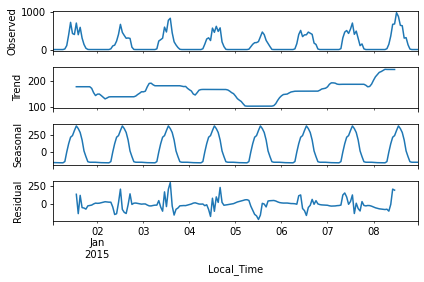

In [ ]:
s_dec_additive = seasonal_decompose(df['2015-01-01':'2015-01-08'], model = "additive")
s_dec_additive.plot()
plt.show()

En este caso se puede observar un claro efecto estacional, y es así porque la radiación solar siempre estará presente durante el día y desaparecerá en la noche.

## Autocorrelación

Se busca si los valores pasados de la serie temporal tienen algún efecto sobre los valores actuales.

In [ ]:
import statsmodels.graphics.tsaplots as sgt

Se observa autocorrelación con los datos de un día antes (24h) y hasta dos días antes (48h).

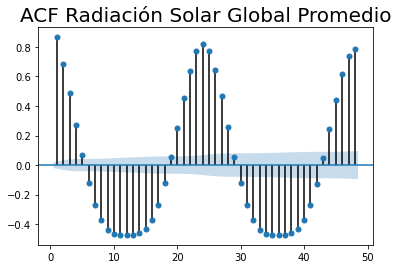

In [ ]:
sgt.plot_acf(df, lags = 48, zero = False)
plt.title("ACF Radiación Solar Global Promedio", size = 20)
plt.show()

## Autocorrelación parcial
Se utiliza el método de mínimos cuadrados ordinarios para descartar los efectos indirectos. Es decir, se buscan los datos pasados que tengan un peso real sobre el dato actual. 

La influencia de datos pasados se mantiene hasta cerca de 24 horas, en el caso anterior la correlación se extendía más hacia el pasado debido a la influencia acumulada de todas las horas pasadas.

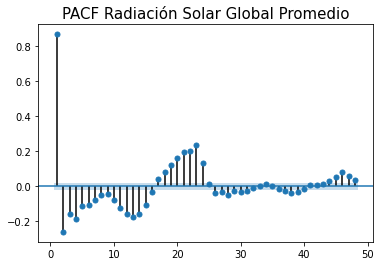

In [ ]:
sgt.plot_pacf(df, lags = 48, zero = False, method = ('ols'))
plt.title("PACF Radiación Solar Global Promedio", size = 15)
plt.show()

Estos resultados permiten determinar la ventana de datos pasados que pueden alimentar al modelo. Utilizar más de 24 horas pasadas para predecir la hora actual no va a lograr mejores resultados.